In [42]:
# 사용할 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression


In [43]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [45]:
# NaN 값 평균치로 채움
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [47]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [48]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = df['mpg'].to_numpy()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape, X_test.shape

((318, 6), (80, 6))

### 데이터 전처리

In [51]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [52]:
X_train_scaled

array([[ 1.52718818,  1.0901965 ,  1.26183446,  0.55282624, -1.31933367,
        -1.6966673 ],
       [-0.85051483, -0.92299623, -0.41351298, -0.99966729, -0.41318225,
        -1.6966673 ],
       [-0.85051483, -0.98134964, -0.95394763, -1.1247723 ,  0.92792185,
         1.63897537],
       ...,
       [-0.85051483, -0.56315019, -0.22436085, -0.54094894, -0.30444408,
         0.52709448],
       [-0.85051483, -1.00080078, -1.11607803, -1.09498539,  0.60170734,
         1.36100515],
       [-0.85051483, -0.92299623, -1.54842576, -1.21413301,  1.94281144,
        -0.86275663]])

In [53]:
X_test_scaled

array([[-0.85051483, -0.98134964, -1.35927363, -1.39881183,  0.63795339,
        -0.02884597],
       [-0.85051483, -0.69930815, -0.65670857, -0.40988656,  1.07290607,
         1.63897537],
       [ 0.33833667,  0.38995555, -0.08925218, -0.39916327, -0.9568731 ,
        -1.41869708],
       [ 1.52718818,  1.22635446,  1.26183446,  1.15690469, -0.88438099,
        -0.02884597],
       [ 1.52718818,  1.22635446,  1.26183446,  1.51077313, -0.41318225,
        -0.86275663],
       [-0.85051483, -0.92299623, -0.41351298, -1.03541158,  0.31173888,
        -1.14072686],
       [-0.85051483, -0.50479678, -0.30542605, -0.12393226,  0.27549283,
         1.63897537],
       [ 1.52718818,  2.41287384,  3.01824709,  2.10412829, -1.68179423,
        -0.86275663],
       [ 1.52718818,  0.66227147,  0.18096514,  1.29988184,  1.2178903 ,
         0.24912426],
       [ 0.33833667,  0.07873735,  0.03151842, -0.1120175 ,  0.49296917,
        -0.58478641],
       [ 1.52718818,  1.92659541,  2.34270377,  1.

In [54]:
y_test, y_train

(array([33. , 28. , 19. , 13. , 14. , 27. , 24. , 13. , 17. , 21. , 15. ,
        38. , 26. , 15. , 25. , 12. , 31. , 17. , 16. , 31. , 22. , 22. ,
        22. , 33.5, 18. , 44. , 26. , 24.5, 18.1, 12. , 27. , 36. , 23. ,
        24. , 37.2, 16. , 21. , 19.2, 16. , 29. , 26.8, 27. , 18. , 10. ,
        23. , 36. , 26. , 25. , 25. , 25. , 22. , 34.1, 32.4, 13. , 23.5,
        14. , 18.5, 29.8, 28. , 19. , 11. , 33. , 23. , 21. , 23. , 25. ,
        23.8, 34.4, 24.5, 13. , 34.7, 14. , 15. , 18. , 25. , 19.9, 17.5,
        28. , 29. , 17. ]),
 array([16. , 27. , 37. , 36.1, 23. , 14. , 32.8, 29.9, 20. , 12. , 15.5,
        23.7, 24. , 36. , 19. , 38. , 29. , 21.5, 27.9, 14. , 36.1, 22. ,
        18. , 17. , 18. , 14. , 26. , 13. , 33. , 37. , 32. , 28. , 19.2,
        32. , 27.4, 20. , 26. , 20.6, 37.3, 16.2, 15. , 21. , 21. , 20.5,
        21. , 25.4, 34.1, 27. , 36. , 31.6, 38.1, 32. , 40.8, 19. , 20. ,
        22. , 17.5, 35.1, 30.5, 33.7, 19. , 14. , 15.5, 15. , 22.5, 29. ,
        23

# 선형회귀

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
print(lr.predict(X_test))

[31.53109579 30.70849255 21.76226    17.00367581 12.6130019  26.21298858
 28.91110402  9.203019   17.21958478 22.74890141 12.68127025 34.98788977
 26.69305024 14.05845246 24.77721826  5.90349606 30.87237625 23.812746
 15.88074362 35.1630653  23.44503249 19.69097766 29.32850815 30.33475799
 15.09790363 34.56140773 25.77970744 25.76026735 22.17155643  7.92248019
 29.35879131 34.94809283 20.00733969 24.92500913 33.10362116 12.27718714
 24.47963851 22.19709231 12.37774229 26.9653782  27.64455572 27.40742955
 20.29321008  7.75458288 23.2567278  33.67959269 26.58280382 24.46965565
 22.78493184 27.69250537 23.46866786 32.51641698 31.29673875 10.59203038
 29.0331764   9.37415973 19.459108   28.30596417 24.25237835 20.74590348
 16.50177291 30.73792699 24.91739479 20.29843339 21.63449641 24.35609011
 25.87130899 33.72516256 29.33902158 12.67787803 32.43029722 13.33055945
  9.42921327 19.56240271 28.60182876 22.6343755  20.65938631 30.94091434
 29.50369472 20.21097656]


In [57]:
print(lr.coef_, lr.intercept_)

[ 0.06912753  0.00161762  0.00274372 -0.00704049  0.07985934  0.80115473] -18.677658874713345


In [58]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8038965489657075
0.8244069426990221


In [59]:
X_train ** 2, X_train

(     cylinders  displacement  horsepower    weight  acceleration  model_year
 3           64       92416.0     22500.0  11785489        144.00        4900
 18          16        9409.0      7744.0   4536900        210.25        4900
 376         16        8281.0      4624.0   4100625        331.24        6724
 248         16        8281.0      3600.0   3240000        268.96        6084
 177         16       13225.0      9025.0   7257636        225.00        5625
 ..         ...           ...         ...       ...           ...         ...
 71           9        4900.0      9409.0   5428900        182.25        5184
 106         64      122500.0     32400.0  20241001        156.25        5329
 270         16       17956.0      9025.0   6325225        219.04        6084
 348         16        7921.0      3844.0   4202500        299.29        6561
 102         16        9409.0      2116.0   3802500        441.00        5329
 
 [318 rows x 6 columns],
      cylinders  displacement  horsep

# 결정 트리

In [60]:
y_train

array([16. , 27. , 37. , 36.1, 23. , 14. , 32.8, 29.9, 20. , 12. , 15.5,
       23.7, 24. , 36. , 19. , 38. , 29. , 21.5, 27.9, 14. , 36.1, 22. ,
       18. , 17. , 18. , 14. , 26. , 13. , 33. , 37. , 32. , 28. , 19.2,
       32. , 27.4, 20. , 26. , 20.6, 37.3, 16.2, 15. , 21. , 21. , 20.5,
       21. , 25.4, 34.1, 27. , 36. , 31.6, 38.1, 32. , 40.8, 19. , 20. ,
       22. , 17.5, 35.1, 30.5, 33.7, 19. , 14. , 15.5, 15. , 22.5, 29. ,
       23. , 18. , 25.5, 24. , 14. , 16.5, 20.3, 26. , 15. , 33.8, 11. ,
       28. , 19. , 30. , 27.2, 16.5, 29. , 20. , 15. , 17.5, 18. , 24. ,
       20.2, 13. , 12. , 20. , 13. , 26. , 34.5, 18. , 18.5, 13. , 26. ,
       18. , 31. , 24. , 11. , 19.4, 32.9, 31.5, 19.1, 24. , 20. , 28. ,
       29. , 14. , 35. , 29.5, 23.6, 15.5, 20.6, 34.2, 25. , 36.4, 22.3,
       19. , 19.8, 31. , 14. , 14. , 43.4, 26. , 33.5, 19. , 22. , 27.2,
       32.7, 29. , 17.6, 23. , 34. , 17.6, 30.7, 21. , 38. , 16. , 15. ,
       20. , 29. , 32. , 18. , 32. , 15. , 16. , 34

In [61]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

1.0
0.7889924605623558


In [39]:
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (278, 6)
test data 개수:  (120, 6)


In [62]:
dt.feature_importances_

array([0.00778079, 0.60344346, 0.16636182, 0.06684452, 0.03418851,
       0.12138089])

In [63]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


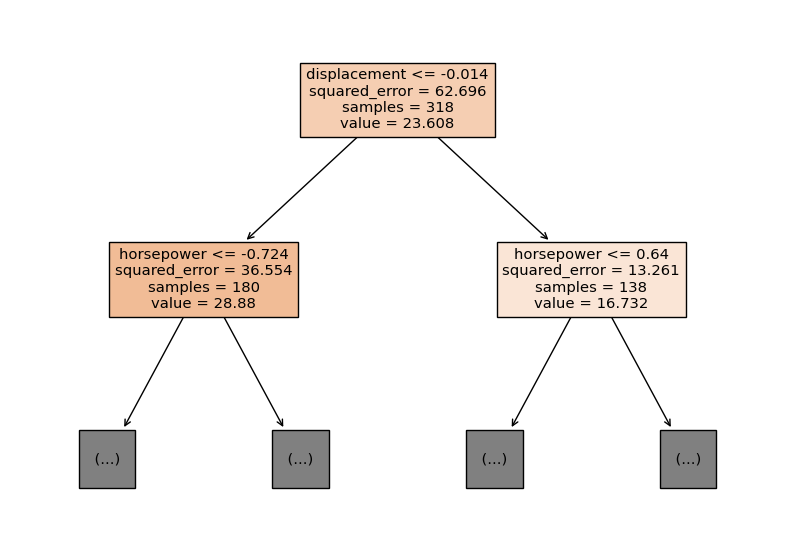

In [64]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, 
          feature_names=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'])
plt.show()

In [65]:
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.8334697724866797
0.7427648476710244


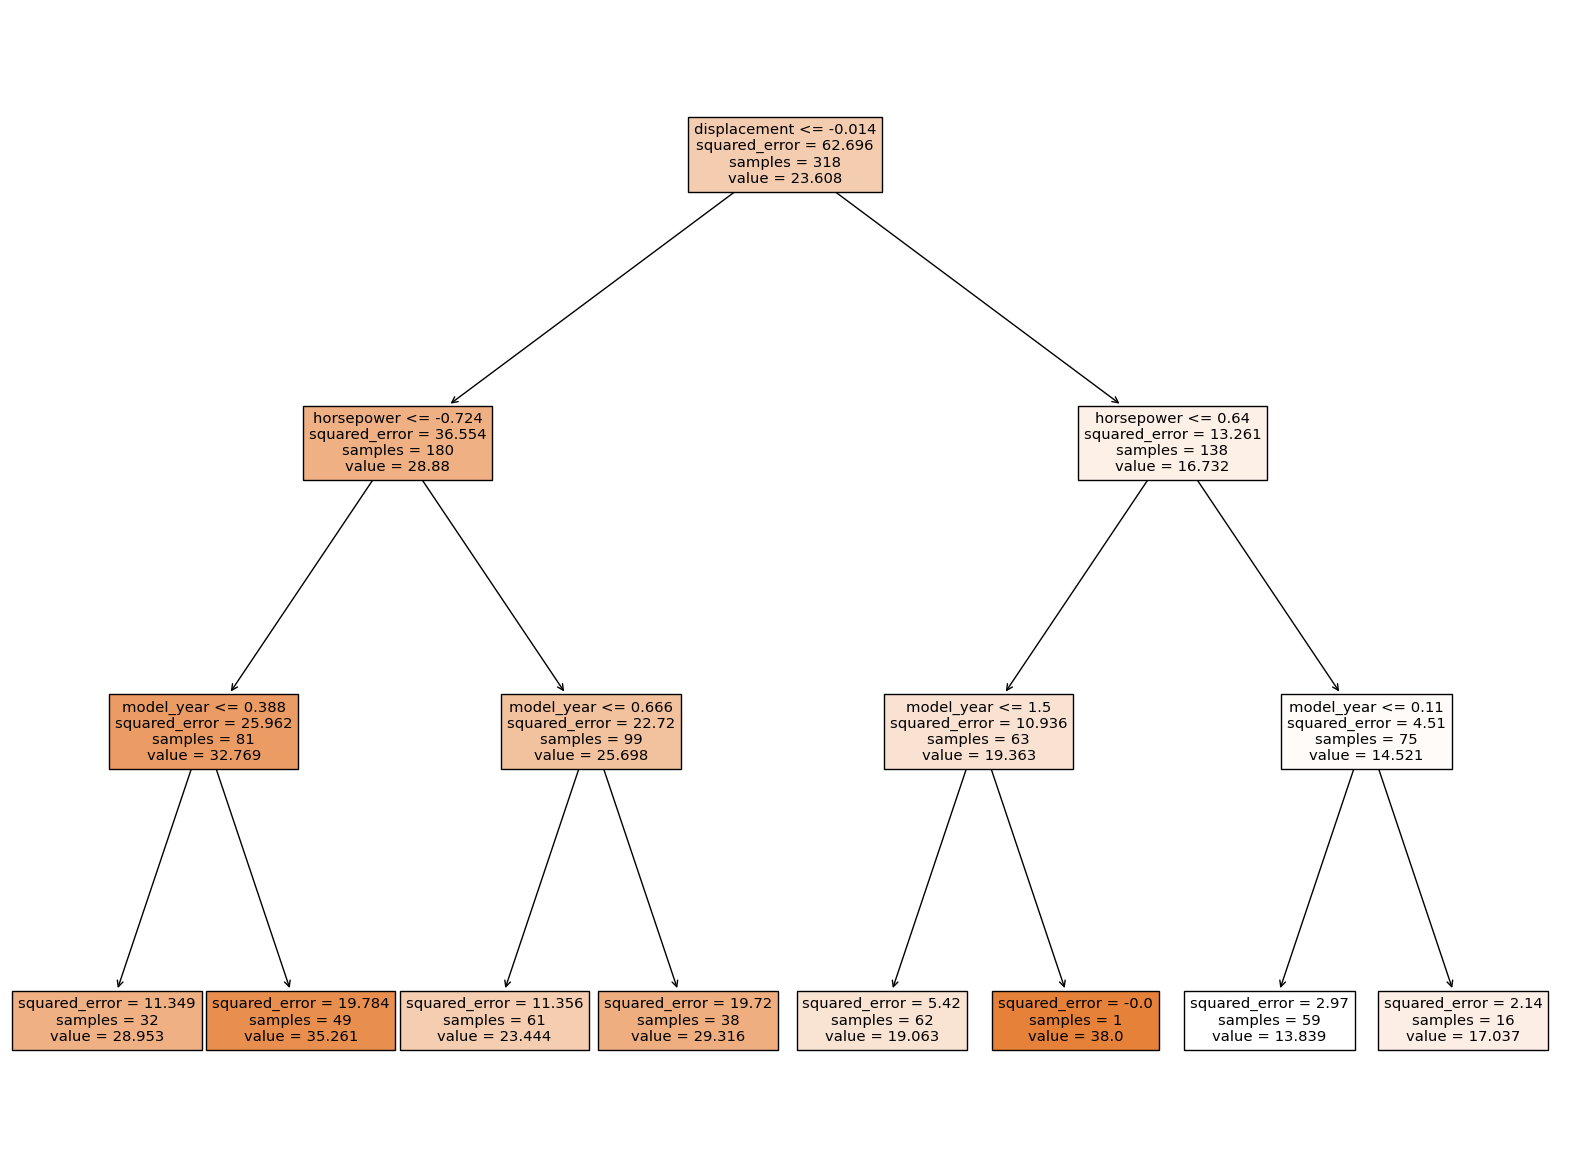

In [66]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True,
          feature_names=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'])
plt.show()

In [67]:
dt.feature_importances_

array([0.        , 0.69371962, 0.18236164, 0.        , 0.        ,
       0.12391874])

0.8334697724866797
0.7427648476710244
[0.         0.69371962 0.18236164 0.         0.         0.12391874]


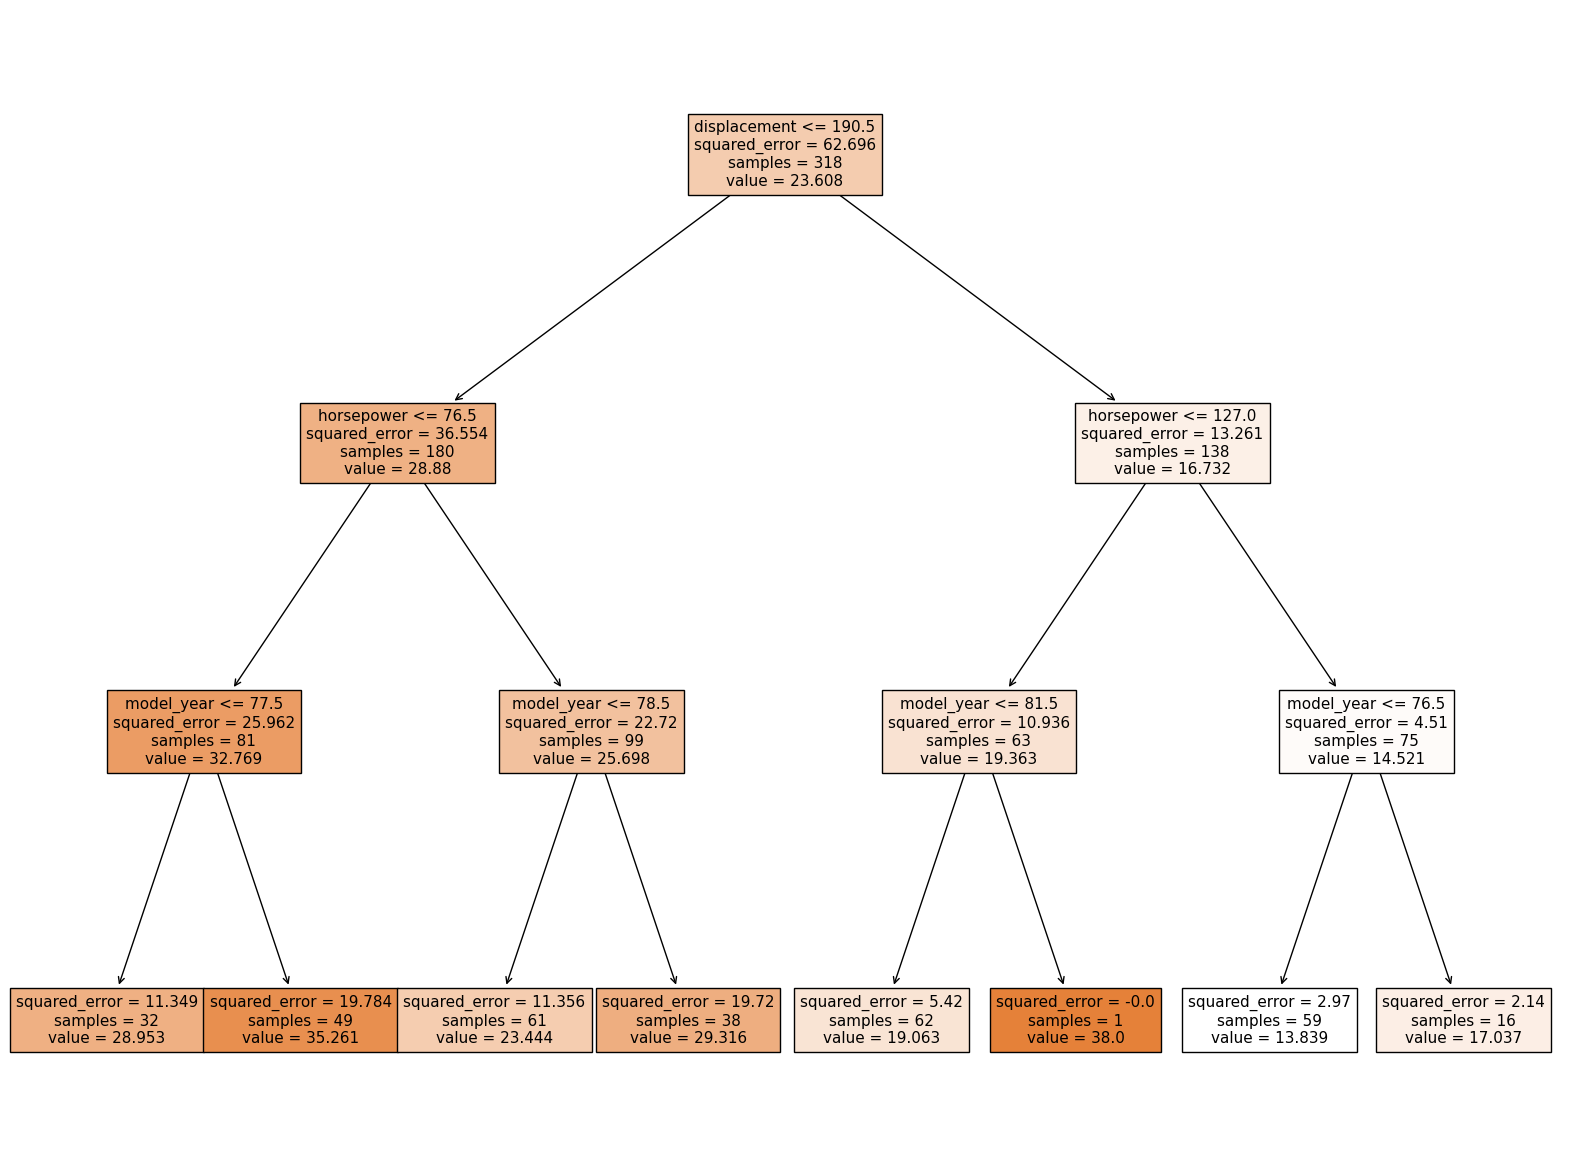

In [68]:
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
#print(dt.feature_names_in_)
print(dt.feature_importances_)

# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True,
          feature_names= ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'])
plt.show()

0.999893725688053
0.7784932823974949


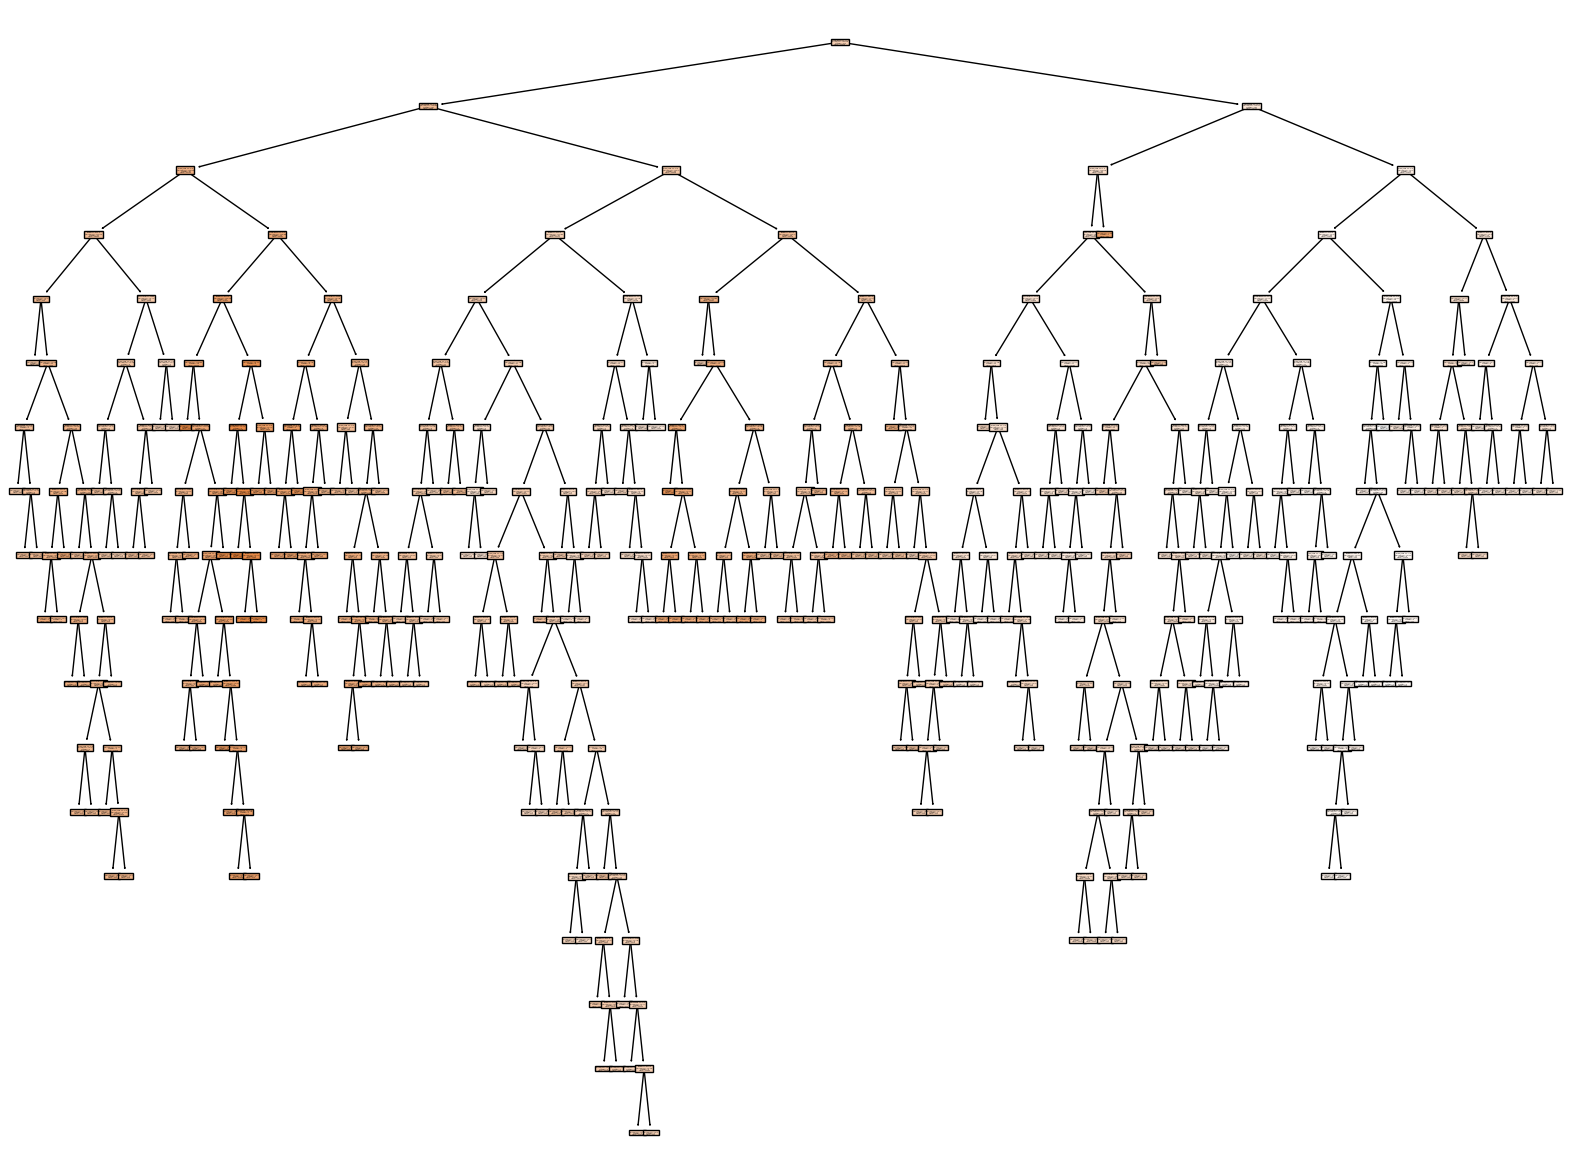

In [69]:
dt = DecisionTreeRegressor(min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True,
          feature_names=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'])
plt.show()

0.9232325823868971
0.797034083716745


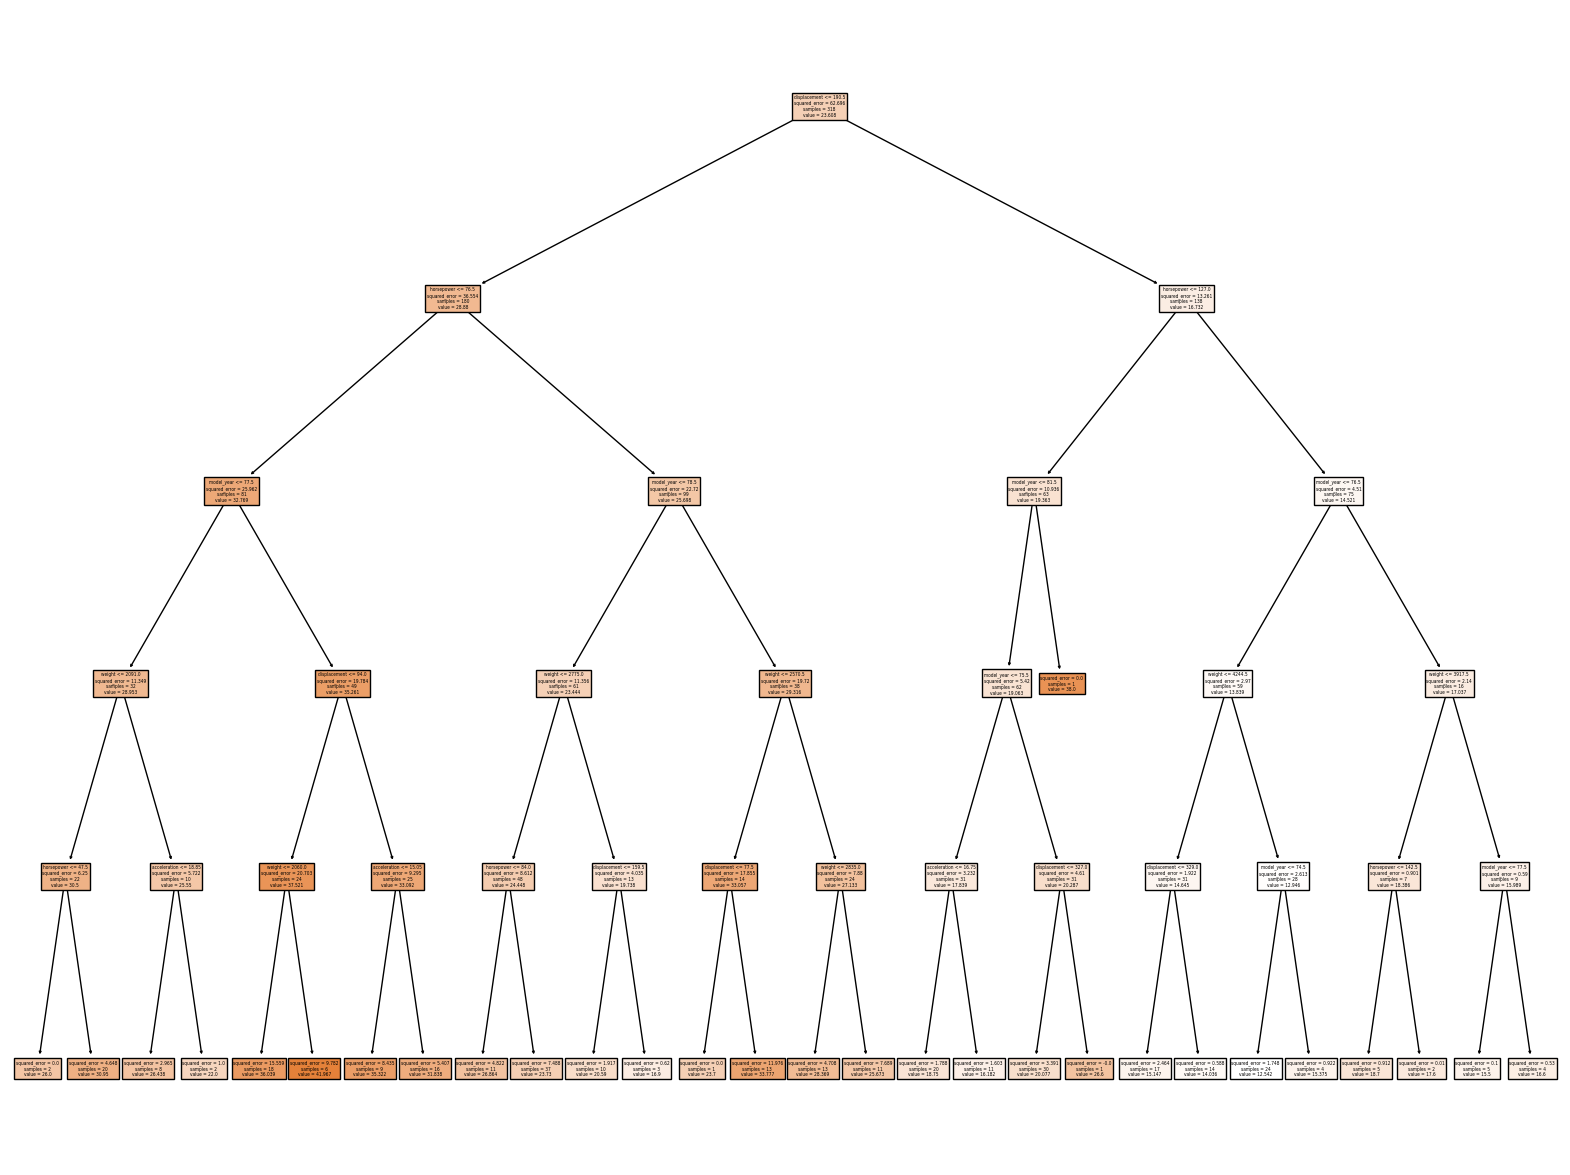

In [70]:
dt = DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True,
          feature_names=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'])
plt.show()

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs = GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [76]:
dt = gs.best_estimator_
dt.score(X_train, y_train)

0.9999908881459906

In [77]:
gs.best_params_

{'min_impurity_decrease': 0.0001}

In [78]:
gs.cv_results_['mean_test_score']

array([0.76308876, 0.76063299, 0.75831174, 0.75675157, 0.75559898])

In [79]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
gs.cv_results_['params'][best_index]

{'min_impurity_decrease': 0.0001}

In [80]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [81]:
gs = GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [82]:
gs.best_params_

{'max_depth': 7, 'min_impurity_decrease': 0.0001, 'min_samples_split': 12}

In [83]:
np.max(gs.cv_results_['mean_test_score'])

0.8022355276210202

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

gs = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x177d18400>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x30c406d60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x177f60610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30c406ac0>},
                   random_state=42)

In [86]:
gs.best_params_

{'max_depth': 39,
 'min_impurity_decrease': 0.00034102546602601173,
 'min_samples_leaf': 7,
 'min_samples_split': 13}

In [87]:
np.max(gs.cv_results_['mean_test_score'])

0.8116523203976623

In [88]:
dt = gs.best_estimator_

dt.score(X_test, y_test)

0.8614505240117782

In [89]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 계수(1) 추가 안 함
poly.fit(X_train)
train_poly = poly.transform(X_train)
train_poly[:5] # 추가된 특성 확인

array([[8.0000000e+00, 3.0400000e+02, 1.5000000e+02, 3.4330000e+03,
        1.2000000e+01, 7.0000000e+01, 6.4000000e+01, 2.4320000e+03,
        1.2000000e+03, 2.7464000e+04, 9.6000000e+01, 5.6000000e+02,
        9.2416000e+04, 4.5600000e+04, 1.0436320e+06, 3.6480000e+03,
        2.1280000e+04, 2.2500000e+04, 5.1495000e+05, 1.8000000e+03,
        1.0500000e+04, 1.1785489e+07, 4.1196000e+04, 2.4031000e+05,
        1.4400000e+02, 8.4000000e+02, 4.9000000e+03],
       [4.0000000e+00, 9.7000000e+01, 8.8000000e+01, 2.1300000e+03,
        1.4500000e+01, 7.0000000e+01, 1.6000000e+01, 3.8800000e+02,
        3.5200000e+02, 8.5200000e+03, 5.8000000e+01, 2.8000000e+02,
        9.4090000e+03, 8.5360000e+03, 2.0661000e+05, 1.4065000e+03,
        6.7900000e+03, 7.7440000e+03, 1.8744000e+05, 1.2760000e+03,
        6.1600000e+03, 4.5369000e+06, 3.0885000e+04, 1.4910000e+05,
        2.1025000e+02, 1.0150000e+03, 4.9000000e+03],
       [4.0000000e+00, 9.1000000e+01, 6.8000000e+01, 2.0250000e+03,
        

In [90]:
print(train_poly.shape)

(318, 27)


In [91]:
poly.get_feature_names_out()

array(['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'cylinders^2',
       'cylinders displacement', 'cylinders horsepower',
       'cylinders weight', 'cylinders acceleration',
       'cylinders model_year', 'displacement^2',
       'displacement horsepower', 'displacement weight',
       'displacement acceleration', 'displacement model_year',
       'horsepower^2', 'horsepower weight', 'horsepower acceleration',
       'horsepower model_year', 'weight^2', 'weight acceleration',
       'weight model_year', 'acceleration^2', 'acceleration model_year',
       'model_year^2'], dtype=object)

In [92]:
test_poly = poly.transform(X_test)

In [93]:
test_poly[:5]

array([[4.0000000e+00, 9.1000000e+01, 5.3000000e+01, 1.7950000e+03,
        1.7400000e+01, 7.6000000e+01, 1.6000000e+01, 3.6400000e+02,
        2.1200000e+02, 7.1800000e+03, 6.9600000e+01, 3.0400000e+02,
        8.2810000e+03, 4.8230000e+03, 1.6334500e+05, 1.5834000e+03,
        6.9160000e+03, 2.8090000e+03, 9.5135000e+04, 9.2220000e+02,
        4.0280000e+03, 3.2220250e+06, 3.1233000e+04, 1.3642000e+05,
        3.0276000e+02, 1.3224000e+03, 5.7760000e+03],
       [4.0000000e+00, 1.2000000e+02, 7.9000000e+01, 2.6250000e+03,
        1.8600000e+01, 8.2000000e+01, 1.6000000e+01, 4.8000000e+02,
        3.1600000e+02, 1.0500000e+04, 7.4400000e+01, 3.2800000e+02,
        1.4400000e+04, 9.4800000e+03, 3.1500000e+05, 2.2320000e+03,
        9.8400000e+03, 6.2410000e+03, 2.0737500e+05, 1.4694000e+03,
        6.4780000e+03, 6.8906250e+06, 4.8825000e+04, 2.1525000e+05,
        3.4596000e+02, 1.5252000e+03, 6.7240000e+03],
       [6.0000000e+00, 2.3200000e+02, 1.0000000e+02, 2.6340000e+03,
        

In [94]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train_poly, y_train)

DecisionTreeRegressor()

In [95]:
print(dtr.score(train_poly, y_train))
print(dtr.score(test_poly, y_test))

1.0
0.7333769168990277


In [96]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)

In [97]:
print(train_poly[:1])
print(test_poly[:1])

[[8.00000000e+00 3.04000000e+02 1.50000000e+02 3.43300000e+03
  1.20000000e+01 7.00000000e+01 6.40000000e+01 2.43200000e+03
  1.20000000e+03 2.74640000e+04 9.60000000e+01 5.60000000e+02
  9.24160000e+04 4.56000000e+04 1.04363200e+06 3.64800000e+03
  2.12800000e+04 2.25000000e+04 5.14950000e+05 1.80000000e+03
  1.05000000e+04 1.17854890e+07 4.11960000e+04 2.40310000e+05
  1.44000000e+02 8.40000000e+02 4.90000000e+03 5.12000000e+02
  1.94560000e+04 9.60000000e+03 2.19712000e+05 7.68000000e+02
  4.48000000e+03 7.39328000e+05 3.64800000e+05 8.34905600e+06
  2.91840000e+04 1.70240000e+05 1.80000000e+05 4.11960000e+06
  1.44000000e+04 8.40000000e+04 9.42839120e+07 3.29568000e+05
  1.92248000e+06 1.15200000e+03 6.72000000e+03 3.92000000e+04
  2.80944640e+07 1.38624000e+07 3.17264128e+08 1.10899200e+06
  6.46912000e+06 6.84000000e+06 1.56544800e+08 5.47200000e+05
  3.19200000e+06 3.58278866e+09 1.25235840e+07 7.30542400e+07
  4.37760000e+04 2.55360000e+05 1.48960000e+06 3.37500000e+06
  7.7242

In [98]:
print(train_poly.shape)

(318, 461)


In [100]:
dtr.fit(train_poly, y_train)
print(dtr.score(train_poly, y_train))
print(dtr.score(test_poly, y_test))

1.0
0.7835034421446183


In [101]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) # 훈련 데이터로 한번만 fit진행. 테스트 데이터는 fit이 아닌 transform을 적용

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [102]:
print(train_scaled[:1])
print(test_scaled[:1])

[[ 1.52718818e+00  1.09019650e+00  1.26183446e+00  5.52826238e-01
  -1.31933367e+00 -1.69666730e+00  1.59311515e+00  1.25294508e+00
   1.44737347e+00  1.00387125e+00  6.04787913e-01  1.23462430e+00
   9.40313335e-01  1.07591871e+00  7.70397033e-01  6.13081234e-01
   9.16307710e-01  1.12354675e+00  8.58695418e-01  6.45213884e-01
   1.03333189e+00  4.21143362e-01 -3.52362738e-01  2.53226977e-01
  -1.21579224e+00 -1.53080565e+00 -1.65441561e+00  1.64367380e+00
   1.33332109e+00  1.51017464e+00  1.15439995e+00  1.14042583e+00
   1.40805635e+00  1.02031918e+00  1.15764957e+00  9.04409859e-01
   9.56821281e-01  1.11799870e+00  1.23852273e+00  1.02388093e+00
   1.15500510e+00  1.29914286e+00  6.90219989e-01  5.37744265e-01
   8.37403752e-01 -3.29165306e-01  2.66775050e-01  9.04538705e-01
   7.27953865e-01  8.31463015e-01  6.60609646e-01  7.49704865e-01
   8.41397199e-01  8.99439801e-01  7.58179735e-01  8.99278121e-01
   9.70655780e-01  5.17762103e-01  4.69192592e-01  6.52291840e-01
  -1.52947

In [103]:
print(ss.mean_)

[5.43081761e+00 1.91904088e+02 1.03302978e+02 2.96901572e+03
 1.56399371e+01 7.61037736e+01 3.23238994e+01 1.20683962e+03
 6.12935182e+02 1.73861887e+04 8.27110063e+01 4.11053459e+02
 4.73994914e+04 2.31885580e+04 6.49978239e+05 2.85595377e+03
 1.44623962e+04 1.20410417e+04 3.33110185e+05 1.54756569e+03
 7.80526081e+03 9.51947040e+06 4.55531387e+04 2.25007553e+05
 2.52219277e+02 1.19310377e+03 5.80472642e+03 2.08864780e+02
 8.14753774e+03 3.96512437e+03 1.10828000e+05 4.77776415e+02
 2.43299057e+03 3.31108063e+05 1.57029078e+05 4.33221279e+06
 1.74229469e+04 9.04431855e+04 7.78452360e+04 2.12157697e+06
 8.89986151e+03 4.60259269e+04 5.97479642e+07 2.59054361e+05
 1.30995969e+06 1.30323267e+03 6.27998082e+03 3.11808774e+04
 1.39243269e+07 6.49087656e+06 1.76413511e+08 6.68765022e+05
 3.53731204e+06 3.13214621e+06 8.40976716e+07 3.28204044e+05
 1.73304314e+06 2.33889175e+09 9.46588691e+06 4.87622586e+07
 4.40963996e+04 2.16054750e+05 1.09231549e+06 1.58232827e+06
 4.20168002e+07 1.719221

In [104]:
print(ss.scale_)

[1.68229589e+00 1.02821750e+02 3.70072492e+01 8.39294963e+02
 2.75892081e+00 3.59750764e+00 1.98831206e+01 9.77824486e+02
 4.05607005e+02 1.00389480e+04 2.19729817e+01 1.20641187e+02
 4.78739448e+04 2.08300514e+04 5.10975178e+05 1.29191073e+03
 7.44029948e+03 9.30887682e+03 2.11762880e+05 3.91241285e+02
 2.60781575e+03 5.38063474e+06 1.23654922e+04 6.04297643e+04
 8.90113238e+01 2.30665320e+02 5.46855583e+02 1.84425414e+02
 8.48142461e+03 3.73127417e+03 9.43208638e+04 2.54487033e+02
 1.45378374e+03 4.00090428e+05 1.79476525e+05 4.44139698e+06
 1.22917972e+04 7.13746937e+04 8.24811376e+04 1.95142126e+06
 4.76200363e+03 2.92300980e+04 5.00361455e+07 1.31128575e+05
 7.31451593e+05 4.59442932e+02 1.64940156e+03 8.86542786e+03
 1.94657077e+07 8.86572621e+06 2.13213080e+08 5.87200375e+05
 3.48445177e+06 4.12240351e+06 9.55540290e+07 2.43524168e+05
 1.50306307e+06 2.40244873e+09 6.51693385e+06 3.72409708e+07
 2.09483227e+04 9.55310574e+04 5.43326622e+05 1.96635456e+06
 4.39551457e+07 1.057017

In [105]:
print(dtr.score(train_scaled, y_train))
print(dtr.score(test_scaled, y_test))

-0.09124667071119208
-0.15186621395245248


### 릿지 확인

In [106]:
train_scaled[0]

array([ 1.52718818e+00,  1.09019650e+00,  1.26183446e+00,  5.52826238e-01,
       -1.31933367e+00, -1.69666730e+00,  1.59311515e+00,  1.25294508e+00,
        1.44737347e+00,  1.00387125e+00,  6.04787913e-01,  1.23462430e+00,
        9.40313335e-01,  1.07591871e+00,  7.70397033e-01,  6.13081234e-01,
        9.16307710e-01,  1.12354675e+00,  8.58695418e-01,  6.45213884e-01,
        1.03333189e+00,  4.21143362e-01, -3.52362738e-01,  2.53226977e-01,
       -1.21579224e+00, -1.53080565e+00, -1.65441561e+00,  1.64367380e+00,
        1.33332109e+00,  1.51017464e+00,  1.15439995e+00,  1.14042583e+00,
        1.40805635e+00,  1.02031918e+00,  1.15764957e+00,  9.04409859e-01,
        9.56821281e-01,  1.11799870e+00,  1.23852273e+00,  1.02388093e+00,
        1.15500510e+00,  1.29914286e+00,  6.90219989e-01,  5.37744265e-01,
        8.37403752e-01, -3.29165306e-01,  2.66775050e-01,  9.04538705e-01,
        7.27953865e-01,  8.31463015e-01,  6.60609646e-01,  7.49704865e-01,
        8.41397199e-01,  

In [107]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.8965318561192809
0.891685234696974


In [108]:
rw = ridge.coef_
print(rw)
rb = ridge.intercept_
print(rb)

print('모델이 예측한 값:', ridge.predict([[ 1.52718818e+00,  1.09019650e+00,  1.26183446e+00,  5.52826238e-01,
       -1.31933367e+00, -1.69666730e+00,  1.59311515e+00,  1.25294508e+00,
        1.44737347e+00,  1.00387125e+00,  6.04787913e-01,  1.23462430e+00,
        9.40313335e-01,  1.07591871e+00,  7.70397033e-01,  6.13081234e-01,
        9.16307710e-01,  1.12354675e+00,  8.58695418e-01,  6.45213884e-01,
        1.03333189e+00,  4.21143362e-01, -3.52362738e-01,  2.53226977e-01,
       -1.21579224e+00, -1.53080565e+00, -1.65441561e+00,  1.64367380e+00,
        1.33332109e+00,  1.51017464e+00,  1.15439995e+00,  1.14042583e+00,
        1.40805635e+00,  1.02031918e+00,  1.15764957e+00,  9.04409859e-01,
        9.56821281e-01,  1.11799870e+00,  1.23852273e+00,  1.02388093e+00,
        1.15500510e+00,  1.29914286e+00,  6.90219989e-01,  5.37744265e-01,
        8.37403752e-01, -3.29165306e-01,  2.66775050e-01,  9.04538705e-01,
        7.27953865e-01,  8.31463015e-01,  6.60609646e-01,  7.49704865e-01,
        8.41397199e-01,  8.99439801e-01,  7.58179735e-01,  8.99278121e-01,
        9.70655780e-01,  5.17762103e-01,  4.69192592e-01,  6.52291840e-01,
       -1.52947626e-02,  4.11439498e-01,  7.31207516e-01,  9.11672679e-01,
        8.01401047e-01,  9.27872805e-01,  1.01043279e+00,  5.80666597e-01,
        5.08995609e-01,  7.21612882e-01, -3.50421784e-01,  3.09301874e-01,
        7.69333228e-01,  2.80757547e-01, -2.21259436e-02,  2.72784752e-01,
       -8.25132431e-01, -6.15180379e-01, -5.97920329e-02, -1.09171116e+00,
       -1.30516227e+00, -1.62398183e+00, -1.61262160e+00,  1.67945494e+00,
        1.37961863e+00,  1.54579999e+00,  1.23099593e+00,  1.31808964e+00,
        1.48850593e+00,  1.06644045e+00,  1.20184244e+00,  9.75936114e-01,
        1.11225079e+00,  1.21331442e+00,  1.29068356e+00,  1.10023546e+00,
        1.30055313e+00,  1.38569187e+00,  8.13687893e-01,  8.40561469e-01,
        1.02229383e+00,  4.80181187e-01,  9.34822729e-01,  1.21435195e+00,
        7.67866391e-01,  8.72456663e-01,  7.21244358e-01,  8.81466197e-01,
        9.30018167e-01,  9.47048643e-01,  8.24804750e-01,  1.03612410e+00,
        1.06511694e+00,  6.14885163e-01,  6.89459601e-01,  8.03456315e-01,
        4.98646447e-01,  8.05042767e-01,  9.78258929e-01,  9.78882597e-01,
        8.87486415e-01,  1.11382248e+00,  1.14510089e+00,  7.00500727e-01,
        7.99929582e-01,  9.16527673e-01,  5.90834542e-01,  9.75752979e-01,
        1.13998675e+00,  4.49112111e-01,  3.94182671e-01,  5.78644373e-01,
       -2.22105534e-02,  3.58598646e-01,  6.64074344e-01, -6.84461882e-01,
       -5.21797844e-01, -5.82437178e-02,  5.57268517e-01,  5.06781223e-01,
        5.84320957e-01,  4.87910499e-01,  6.49114741e-01,  6.62023453e-01,
        6.42697593e-01,  5.69580115e-01,  7.71660806e-01,  7.64530678e-01,
        4.22290655e-01,  5.19276265e-01,  5.84833585e-01,  4.28271725e-01,
        6.35363089e-01,  7.39260580e-01,  6.76541062e-01,  6.25891070e-01,
        8.45890516e-01,  8.32087695e-01,  4.96776980e-01,  6.19612266e-01,
        6.78660961e-01,  5.42134234e-01,  7.71598583e-01,  8.59694610e-01,
        3.10805256e-01,  3.13168074e-01,  4.33604010e-01,  7.30091902e-02,
        3.40145863e-01,  5.30746996e-01, -4.34949478e-01, -1.77663047e-01,
        2.08997689e-01,  5.38384944e-01,  6.76483381e-01,  6.44635785e-01,
        8.39595585e-01,  8.43735972e-01,  5.35828988e-01,  6.48242614e-01,
        7.18655325e-01,  5.05862175e-01,  7.87488584e-01,  8.88155680e-01,
        3.62461480e-01,  3.53114832e-01,  4.88211664e-01,  1.25688430e-03,
        3.46939914e-01,  5.75999127e-01, -7.83310677e-01, -6.02700792e-01,
       -4.49233465e-02,  4.79268534e-01,  1.46755234e-01,  1.01811818e-02,
        1.86252778e-01, -4.31012954e-01, -1.71164551e-01,  1.20568052e-01,
       -9.02820400e-01, -9.49534996e-01, -8.39429653e-01, -3.59090005e-01,
       -9.61231208e-01, -1.13456224e+00, -1.36115997e+00, -1.64372942e+00,
       -1.57136766e+00,  1.70311944e+00,  1.40748847e+00,  1.56797846e+00,
        1.27529393e+00,  1.40918184e+00,  1.53712826e+00,  1.09435130e+00,
        1.22785021e+00,  1.01762466e+00,  1.19713869e+00,  1.26692776e+00,
        1.31921935e+00,  1.14227608e+00,  1.37273418e+00,  1.43165098e+00,
        8.80593185e-01,  9.82069753e-01,  1.11269695e+00,  8.35095368e-01,
        1.15273175e+00,  1.32999262e+00,  7.92789525e-01,  8.97076346e-01,
        7.57688998e-01,  9.56670939e-01,  9.80740821e-01,  9.74085482e-01,
        8.62707804e-01,  1.10757693e+00,  1.11541463e+00,  6.70223246e-01,
        8.05119105e-01,  8.83036274e-01,  7.55133701e-01,  9.80151402e-01,
        1.09060586e+00,  1.01376977e+00,  9.32385938e-01,  1.19449711e+00,
        1.20570256e+00,  7.63143031e-01,  9.27455473e-01,  1.00488523e+00,
        9.18111142e-01,  1.16093604e+00,  1.25590864e+00,  5.37772532e-01,
        5.88215034e-01,  7.16913028e-01,  4.19642170e-01,  7.02288494e-01,
        8.87603815e-01, -7.75290291e-02,  3.01468351e-01,  7.27209069e-01,
        1.01503739e+00,  5.27351269e-01,  6.04864633e-01,  5.17812583e-01,
        7.11517924e-01,  7.05089097e-01,  6.64992202e-01,  6.00883637e-01,
        8.34388399e-01,  8.09481371e-01,  4.66506629e-01,  6.12212417e-01,
        6.50608194e-01,  6.25816859e-01,  7.77951366e-01,  8.37399286e-01,
        7.03511489e-01,  6.61869324e-01,  9.15803134e-01,  8.84913694e-01,
        5.46101204e-01,  7.21875218e-01,  7.52473392e-01,  7.76682095e-01,
        9.28308034e-01,  9.68949972e-01,  3.78352488e-01,  4.57766629e-01,
        5.39504975e-01,  3.78760956e-01,  5.80633358e-01,  7.00683852e-01,
        4.35978871e-02,  3.56214188e-01,  6.52033350e-01,  8.35134868e-01,
        7.13531291e-01,  6.91576935e-01,  9.35422010e-01,  9.18531917e-01,
        5.97057927e-01,  7.77261797e-01,  8.15124553e-01,  8.31289484e-01,
        1.00567036e+00,  1.04640505e+00,  4.44327983e-01,  5.34617846e-01,
        6.21697326e-01,  4.49657359e-01,  6.81261373e-01,  8.05123354e-01,
       -1.61383117e-02,  4.04902778e-01,  7.85700347e-01,  9.71190821e-01,
        2.54420605e-01,  2.46978984e-01,  3.70109330e-01,  3.91659864e-02,
        2.79024536e-01,  4.65183704e-01, -4.11966444e-01, -1.68455114e-01,
        1.79760669e-01,  4.86757707e-01, -7.65275351e-01, -7.75718143e-01,
       -6.86084445e-01, -3.44547012e-01,  2.20081963e-01,  3.11849125e-01,
        3.67947175e-01,  3.14068341e-01,  4.83259244e-01,  4.61921833e-01,
        4.12920960e-01,  3.76866993e-01,  5.78379675e-01,  5.39653449e-01,
        2.85732670e-01,  4.22864342e-01,  4.35726676e-01,  4.74524429e-01,
        5.70335655e-01,  5.94141267e-01,  4.45231714e-01,  4.25875449e-01,
        6.47207501e-01,  5.98625203e-01,  3.49571809e-01,  5.14767678e-01,
        5.16382218e-01,  6.04469684e-01,  6.90368416e-01,  6.94966012e-01,
        2.29047878e-01,  3.16929085e-01,  3.65041412e-01,  2.94531686e-01,
        4.34582667e-01,  5.07606810e-01,  7.34344618e-02,  3.15363026e-01,
        5.20114378e-01,  6.34674497e-01,  4.62107211e-01,  4.56916920e-01,
        6.79935393e-01,  6.33349343e-01,  3.95993518e-01,  5.72915506e-01,
        5.72471288e-01,  6.73344229e-01,  7.64168716e-01,  7.61347416e-01,
        2.87073341e-01,  3.91352533e-01,  4.37144462e-01,  3.78088254e-01,
        5.28778387e-01,  5.96554134e-01,  9.99081695e-02,  4.05529283e-01,
        6.38863662e-01,  7.43610319e-01,  1.44474635e-01,  1.66987936e-01,
        2.49746714e-01,  4.78297348e-02,  2.23667108e-01,  3.48209838e-01,
       -2.66341590e-01, -4.30163899e-02,  2.11001002e-01,  4.06969071e-01,
       -6.10346175e-01, -5.30909189e-01, -3.27849467e-01,  1.25848019e-02,
        3.42812244e-01,  4.58787411e-01,  4.63709091e-01,  6.62484383e-01,
        6.34216127e-01,  4.17053987e-01,  5.79260412e-01,  5.91650682e-01,
        6.37822992e-01,  7.58773495e-01,  7.71475657e-01,  3.22169332e-01,
        4.20712613e-01,  4.74783554e-01,  3.77850678e-01,  5.53419853e-01,
        6.31847993e-01, -1.19366274e-02,  3.48823055e-01,  6.36037440e-01,
        7.57096396e-01,  1.87786999e-01,  2.06276376e-01,  2.97103362e-01,
        4.59022967e-02,  2.51615742e-01,  3.92692550e-01, -4.17152145e-01,
       -1.54052412e-01,  1.78733560e-01,  4.23387953e-01, -8.67560127e-01,
       -9.03700757e-01, -8.18698167e-01, -3.76598094e-01,  1.81662131e-01,
        2.96163768e-02, -3.29860700e-02,  8.16619081e-02, -2.71521664e-01,
       -8.55043409e-02,  9.04990999e-02, -6.40827101e-01, -5.40157128e-01,
       -3.15920116e-01, -3.25519006e-02, -8.53882745e-01, -9.58481578e-01,
       -1.04723087e+00, -1.01388343e+00, -6.19007230e-01, -8.34415331e-01,
       -9.81894155e-01, -1.16308608e+00, -1.38916459e+00, -1.62497081e+00,
       -1.53073162e+00]]))
y = 0
i = 0
for data in train_scaled[0]:
    y += rw[i] * data
    i += 1
y += rb
print(f'y =[{y}]')

[ 1.29797006e+00  4.62364413e-01  4.47257411e-01 -3.47639070e-01
 -3.68318660e-01 -1.97103185e+00 -5.04717188e-01 -5.90922135e-01
  7.83178643e-01  1.82680038e-01  4.36892855e-01  7.15958975e-01
 -1.02826517e-01  3.94194364e-01  4.32281783e-01 -5.39538378e-01
  2.76814268e-01  1.27847883e-01 -2.96115642e-01  9.40098519e-01
 -6.21239165e-02  3.49751889e-01 -7.42880154e-01 -9.15771007e-01
 -7.04889329e-01 -4.09295276e-01 -7.16424777e-01 -7.80233463e-01
 -8.00605335e-01 -7.78239313e-02 -1.62542859e-01 -6.20097382e-01
 -8.34757425e-01 -5.29832622e-01 -2.79825953e-01 -1.34569186e-01
 -6.58911525e-01 -6.74660415e-01  2.96416637e-01  3.21838929e-01
  8.34379307e-01  5.31741523e-01  2.89359281e-01 -3.00007914e-01
 -1.40079858e-01 -3.78720309e-01 -6.76771866e-03  4.92576413e-01
 -8.70359514e-02 -1.00011290e-01  3.59611343e-02  4.59323964e-02
 -4.96206032e-03  1.30057458e-01  4.98852567e-01  3.45453645e-01
  2.71915557e-01  3.45816001e-01 -5.38868843e-02  3.24751088e-01
 -1.76757626e+00 -5.53503

In [109]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

In [110]:
train_score

[0.9314815777958987,
 0.9198494278381062,
 0.9090501893061322,
 0.8965318561192809,
 0.881827119649228,
 0.8675609476858884]

In [111]:
test_score

[0.8701824447858083,
 0.894082397035151,
 0.8930825274739667,
 0.891685234696974,
 0.8956613427448887,
 0.8968950910663177]

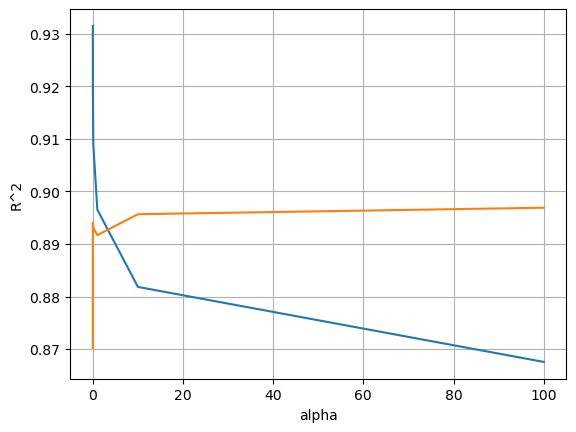

In [114]:
plt.plot(alpha_list, train_score) # alpha리스트의 값이 작으므로 그래프 왼쪽이 너무 촘촘함
plt.plot(alpha_list, test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.grid()
plt.show()

In [115]:
print(alpha_list)
print(np.log10(alpha_list))

[0.001, 0.01, 0.1, 1, 10, 100]
[-3. -2. -1.  0.  1.  2.]


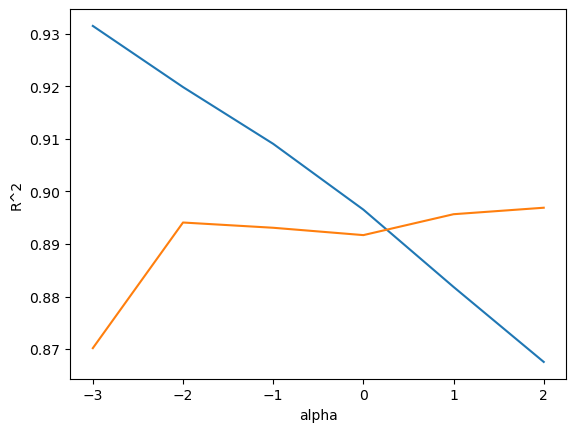

In [116]:
plt.plot(np.log10(alpha_list), train_score) # 로그함수 적용(0.001은 -3, 0.01은 -2와 같이 만듦)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [118]:
ridge = Ridge(alpha=0.2)
ridge.fit(train_scaled, y_train)

print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9055536783879008
0.8922891098692501


### 라쏘 확인

In [119]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.7976082160123987
0.8500230021503004


In [120]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 라쏘 모델을 생성
    lasso = Lasso(alpha=alpha)
    # 라쏘 모델을 훈련
    lasso.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.078e+02, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.906e+01, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(


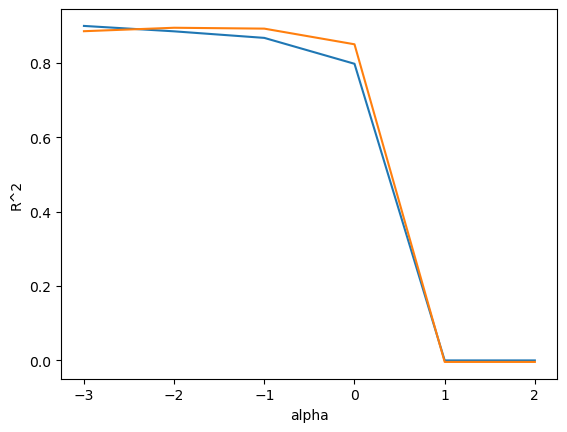

In [121]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [123]:
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.0
-0.00403326341807686


In [124]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, y_train)

print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.0
-0.00403326341807686


In [125]:
lw = lasso.coef_
print(lw)
lb = lasso.intercept_
print(lb)

print('모델이 예측한 값:', lasso.predict([[ 1.52718818e+00,  1.09019650e+00,  1.26183446e+00,  5.52826238e-01,
       -1.31933367e+00, -1.69666730e+00,  1.59311515e+00,  1.25294508e+00,
        1.44737347e+00,  1.00387125e+00,  6.04787913e-01,  1.23462430e+00,
        9.40313335e-01,  1.07591871e+00,  7.70397033e-01,  6.13081234e-01,
        9.16307710e-01,  1.12354675e+00,  8.58695418e-01,  6.45213884e-01,
        1.03333189e+00,  4.21143362e-01, -3.52362738e-01,  2.53226977e-01,
       -1.21579224e+00, -1.53080565e+00, -1.65441561e+00,  1.64367380e+00,
        1.33332109e+00,  1.51017464e+00,  1.15439995e+00,  1.14042583e+00,
        1.40805635e+00,  1.02031918e+00,  1.15764957e+00,  9.04409859e-01,
        9.56821281e-01,  1.11799870e+00,  1.23852273e+00,  1.02388093e+00,
        1.15500510e+00,  1.29914286e+00,  6.90219989e-01,  5.37744265e-01,
        8.37403752e-01, -3.29165306e-01,  2.66775050e-01,  9.04538705e-01,
        7.27953865e-01,  8.31463015e-01,  6.60609646e-01,  7.49704865e-01,
        8.41397199e-01,  8.99439801e-01,  7.58179735e-01,  8.99278121e-01,
        9.70655780e-01,  5.17762103e-01,  4.69192592e-01,  6.52291840e-01,
       -1.52947626e-02,  4.11439498e-01,  7.31207516e-01,  9.11672679e-01,
        8.01401047e-01,  9.27872805e-01,  1.01043279e+00,  5.80666597e-01,
        5.08995609e-01,  7.21612882e-01, -3.50421784e-01,  3.09301874e-01,
        7.69333228e-01,  2.80757547e-01, -2.21259436e-02,  2.72784752e-01,
       -8.25132431e-01, -6.15180379e-01, -5.97920329e-02, -1.09171116e+00,
       -1.30516227e+00, -1.62398183e+00, -1.61262160e+00,  1.67945494e+00,
        1.37961863e+00,  1.54579999e+00,  1.23099593e+00,  1.31808964e+00,
        1.48850593e+00,  1.06644045e+00,  1.20184244e+00,  9.75936114e-01,
        1.11225079e+00,  1.21331442e+00,  1.29068356e+00,  1.10023546e+00,
        1.30055313e+00,  1.38569187e+00,  8.13687893e-01,  8.40561469e-01,
        1.02229383e+00,  4.80181187e-01,  9.34822729e-01,  1.21435195e+00,
        7.67866391e-01,  8.72456663e-01,  7.21244358e-01,  8.81466197e-01,
        9.30018167e-01,  9.47048643e-01,  8.24804750e-01,  1.03612410e+00,
        1.06511694e+00,  6.14885163e-01,  6.89459601e-01,  8.03456315e-01,
        4.98646447e-01,  8.05042767e-01,  9.78258929e-01,  9.78882597e-01,
        8.87486415e-01,  1.11382248e+00,  1.14510089e+00,  7.00500727e-01,
        7.99929582e-01,  9.16527673e-01,  5.90834542e-01,  9.75752979e-01,
        1.13998675e+00,  4.49112111e-01,  3.94182671e-01,  5.78644373e-01,
       -2.22105534e-02,  3.58598646e-01,  6.64074344e-01, -6.84461882e-01,
       -5.21797844e-01, -5.82437178e-02,  5.57268517e-01,  5.06781223e-01,
        5.84320957e-01,  4.87910499e-01,  6.49114741e-01,  6.62023453e-01,
        6.42697593e-01,  5.69580115e-01,  7.71660806e-01,  7.64530678e-01,
        4.22290655e-01,  5.19276265e-01,  5.84833585e-01,  4.28271725e-01,
        6.35363089e-01,  7.39260580e-01,  6.76541062e-01,  6.25891070e-01,
        8.45890516e-01,  8.32087695e-01,  4.96776980e-01,  6.19612266e-01,
        6.78660961e-01,  5.42134234e-01,  7.71598583e-01,  8.59694610e-01,
        3.10805256e-01,  3.13168074e-01,  4.33604010e-01,  7.30091902e-02,
        3.40145863e-01,  5.30746996e-01, -4.34949478e-01, -1.77663047e-01,
        2.08997689e-01,  5.38384944e-01,  6.76483381e-01,  6.44635785e-01,
        8.39595585e-01,  8.43735972e-01,  5.35828988e-01,  6.48242614e-01,
        7.18655325e-01,  5.05862175e-01,  7.87488584e-01,  8.88155680e-01,
        3.62461480e-01,  3.53114832e-01,  4.88211664e-01,  1.25688430e-03,
        3.46939914e-01,  5.75999127e-01, -7.83310677e-01, -6.02700792e-01,
       -4.49233465e-02,  4.79268534e-01,  1.46755234e-01,  1.01811818e-02,
        1.86252778e-01, -4.31012954e-01, -1.71164551e-01,  1.20568052e-01,
       -9.02820400e-01, -9.49534996e-01, -8.39429653e-01, -3.59090005e-01,
       -9.61231208e-01, -1.13456224e+00, -1.36115997e+00, -1.64372942e+00,
       -1.57136766e+00,  1.70311944e+00,  1.40748847e+00,  1.56797846e+00,
        1.27529393e+00,  1.40918184e+00,  1.53712826e+00,  1.09435130e+00,
        1.22785021e+00,  1.01762466e+00,  1.19713869e+00,  1.26692776e+00,
        1.31921935e+00,  1.14227608e+00,  1.37273418e+00,  1.43165098e+00,
        8.80593185e-01,  9.82069753e-01,  1.11269695e+00,  8.35095368e-01,
        1.15273175e+00,  1.32999262e+00,  7.92789525e-01,  8.97076346e-01,
        7.57688998e-01,  9.56670939e-01,  9.80740821e-01,  9.74085482e-01,
        8.62707804e-01,  1.10757693e+00,  1.11541463e+00,  6.70223246e-01,
        8.05119105e-01,  8.83036274e-01,  7.55133701e-01,  9.80151402e-01,
        1.09060586e+00,  1.01376977e+00,  9.32385938e-01,  1.19449711e+00,
        1.20570256e+00,  7.63143031e-01,  9.27455473e-01,  1.00488523e+00,
        9.18111142e-01,  1.16093604e+00,  1.25590864e+00,  5.37772532e-01,
        5.88215034e-01,  7.16913028e-01,  4.19642170e-01,  7.02288494e-01,
        8.87603815e-01, -7.75290291e-02,  3.01468351e-01,  7.27209069e-01,
        1.01503739e+00,  5.27351269e-01,  6.04864633e-01,  5.17812583e-01,
        7.11517924e-01,  7.05089097e-01,  6.64992202e-01,  6.00883637e-01,
        8.34388399e-01,  8.09481371e-01,  4.66506629e-01,  6.12212417e-01,
        6.50608194e-01,  6.25816859e-01,  7.77951366e-01,  8.37399286e-01,
        7.03511489e-01,  6.61869324e-01,  9.15803134e-01,  8.84913694e-01,
        5.46101204e-01,  7.21875218e-01,  7.52473392e-01,  7.76682095e-01,
        9.28308034e-01,  9.68949972e-01,  3.78352488e-01,  4.57766629e-01,
        5.39504975e-01,  3.78760956e-01,  5.80633358e-01,  7.00683852e-01,
        4.35978871e-02,  3.56214188e-01,  6.52033350e-01,  8.35134868e-01,
        7.13531291e-01,  6.91576935e-01,  9.35422010e-01,  9.18531917e-01,
        5.97057927e-01,  7.77261797e-01,  8.15124553e-01,  8.31289484e-01,
        1.00567036e+00,  1.04640505e+00,  4.44327983e-01,  5.34617846e-01,
        6.21697326e-01,  4.49657359e-01,  6.81261373e-01,  8.05123354e-01,
       -1.61383117e-02,  4.04902778e-01,  7.85700347e-01,  9.71190821e-01,
        2.54420605e-01,  2.46978984e-01,  3.70109330e-01,  3.91659864e-02,
        2.79024536e-01,  4.65183704e-01, -4.11966444e-01, -1.68455114e-01,
        1.79760669e-01,  4.86757707e-01, -7.65275351e-01, -7.75718143e-01,
       -6.86084445e-01, -3.44547012e-01,  2.20081963e-01,  3.11849125e-01,
        3.67947175e-01,  3.14068341e-01,  4.83259244e-01,  4.61921833e-01,
        4.12920960e-01,  3.76866993e-01,  5.78379675e-01,  5.39653449e-01,
        2.85732670e-01,  4.22864342e-01,  4.35726676e-01,  4.74524429e-01,
        5.70335655e-01,  5.94141267e-01,  4.45231714e-01,  4.25875449e-01,
        6.47207501e-01,  5.98625203e-01,  3.49571809e-01,  5.14767678e-01,
        5.16382218e-01,  6.04469684e-01,  6.90368416e-01,  6.94966012e-01,
        2.29047878e-01,  3.16929085e-01,  3.65041412e-01,  2.94531686e-01,
        4.34582667e-01,  5.07606810e-01,  7.34344618e-02,  3.15363026e-01,
        5.20114378e-01,  6.34674497e-01,  4.62107211e-01,  4.56916920e-01,
        6.79935393e-01,  6.33349343e-01,  3.95993518e-01,  5.72915506e-01,
        5.72471288e-01,  6.73344229e-01,  7.64168716e-01,  7.61347416e-01,
        2.87073341e-01,  3.91352533e-01,  4.37144462e-01,  3.78088254e-01,
        5.28778387e-01,  5.96554134e-01,  9.99081695e-02,  4.05529283e-01,
        6.38863662e-01,  7.43610319e-01,  1.44474635e-01,  1.66987936e-01,
        2.49746714e-01,  4.78297348e-02,  2.23667108e-01,  3.48209838e-01,
       -2.66341590e-01, -4.30163899e-02,  2.11001002e-01,  4.06969071e-01,
       -6.10346175e-01, -5.30909189e-01, -3.27849467e-01,  1.25848019e-02,
        3.42812244e-01,  4.58787411e-01,  4.63709091e-01,  6.62484383e-01,
        6.34216127e-01,  4.17053987e-01,  5.79260412e-01,  5.91650682e-01,
        6.37822992e-01,  7.58773495e-01,  7.71475657e-01,  3.22169332e-01,
        4.20712613e-01,  4.74783554e-01,  3.77850678e-01,  5.53419853e-01,
        6.31847993e-01, -1.19366274e-02,  3.48823055e-01,  6.36037440e-01,
        7.57096396e-01,  1.87786999e-01,  2.06276376e-01,  2.97103362e-01,
        4.59022967e-02,  2.51615742e-01,  3.92692550e-01, -4.17152145e-01,
       -1.54052412e-01,  1.78733560e-01,  4.23387953e-01, -8.67560127e-01,
       -9.03700757e-01, -8.18698167e-01, -3.76598094e-01,  1.81662131e-01,
        2.96163768e-02, -3.29860700e-02,  8.16619081e-02, -2.71521664e-01,
       -8.55043409e-02,  9.04990999e-02, -6.40827101e-01, -5.40157128e-01,
       -3.15920116e-01, -3.25519006e-02, -8.53882745e-01, -9.58481578e-01,
       -1.04723087e+00, -1.01388343e+00, -6.19007230e-01, -8.34415331e-01,
       -9.81894155e-01, -1.16308608e+00, -1.38916459e+00, -1.62497081e+00,
       -1.53073162e+00]]))
y = 0
i = 0
for data in train_scaled[0]:
    y += lw[i] * data
    i += 1
y += lb
print(f'y =[{y}]')

[-0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0

In [126]:
print(np.sum(lasso.coef_ == 0)) # 전부다 0으로 만들어 버림...

461


In [129]:
X_train_scaled.shape

(318, 6)

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = dtr.predict(train_scaled)
y_test_pred = dtr.predict(test_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")

print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")

Train MAE: 7.048427672955974
Test MAE: 6.455
Train RMSE: 8.2714596066932
Test RMSE: 7.8696728013304345
Train R²: -0.09124667071119208
Test R²: -0.15186621395245248
